In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
df_2019 = pd.read_csv('Resources/2019.csv')

In [3]:
df_2019.head()


,Country,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family/Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Finland,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


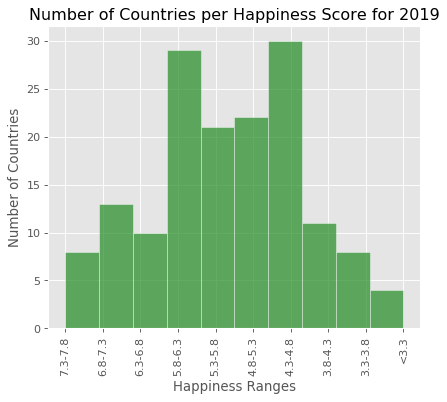

In [4]:
# create Histogram

# Create the bins in which Data will be held for ages 
bins = [2.8, 3.3, 3.8, 4.3, 4.8, 5.3, 5.8, 6.3, 6.8, 7.3, 7.8]

# Create the names for the  bins
group_names = ["<3.3", "3.3-3.8", "3.8-4.3", "4.3-4.8", "4.8-5.3", "5.3-5.8", "5.8-6.3", "6.3-6.8","6.8-7.3","7.3-7.8"]
# Cut them
df_2019["Happiness_Ranges"] = pd.cut(df_2019["Happiness Score"], bins, labels=group_names, include_lowest=True)
#Create Histogram
plt.figure(figsize=(6, 5), dpi=80)
plt.style.use("ggplot")
plt.hist(df_2019.Happiness_Ranges, color="forestgreen", alpha=0.70, ec="white")
plt.xlabel("Happiness Ranges")
plt.ylabel("Number of Countries")
plt.xticks(rotation=90)
plt.title("Number of Countries per Happiness Score for 2019")
png_filepath = "Images/Number of Countries in Happiness Ranges for 2019.png"
plt.savefig(png_filepath)
plt.show()

# Analysis for Histogram for 2019

Highest concentration of countries in the middle ranges between 4.3 and 6.3.  

Two peaks between 5.8 to 6.3 and 4.3 to 4.8

Slightly more countries > 6.3 vs < 4.3